## Introduction

Welcome to **CSM148 - Data Science!** We plan on having you go through some grueling training so you can start crunching data out there... in today's day and age "data is the new oil" or perhaps "snake oil" nonetheless, there's a lot of it, each with different purity (so pure that perhaps you could feed off it for a life time) or dirty which then at that point you can either decide to dump it or try to weed out something useful (that's where they need you... )


In this project you will work through an example project end to end. 

Here are the main steps:

1. Get the data
2. Visualize the data for insights
3. Preprocess the data for your machine learning algorithm
4. Select a model and train
5. Does it meet the requirements? Fine tune the model

![steps](images/MLprocess.jpg)



## Working with Real Data

It is best to experiment with real-data as opposed to aritifical datasets. 

There are many different open datasets depending on the type of problems you might be interested in!

Here are a few data repositories you could check out:
- [UCI Datasets](http://archive.ics.uci.edu/ml/)
- [Kaggle Datasets](kaggle.com)
- [AWS Datasets](https://registry.opendata.aws)

Below we will run through an California Housing example collected from the 1990's.

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    '''
        plt.savefig wrapper. refer to 
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    '''
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "housing")

## Intro to Data Exploration Using Pandas

In this section we will load the dataset, and visualize different
features using different types of plots.

Packages we will use:
- **[Pandas](https://pandas.pydata.org):** is a fast, flexibile and expressive data structure widely used for tabular and multidimensional datasets.
- **[Matplotlib](https://matplotlib.org)**: is a 2d python plotting library which you can use to create quality figures (you can plot almost anything if you're willing to code it out!)
    - other plotting libraries:[seaborn](https://seaborn.pydata.org), [ggplot2](https://ggplot2.tidyverse.org)

In [3]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data(DATASET_PATH) # we load the pandas dataframe
housing.head(5) # show the first five rows of the dataframe
                # typically this is the first thing you do
                # to see how the dataframe looks like

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A dataset may have different types of features
- real valued
- Discrete (integers)
- categorical (strings)

The two categorical features are essentialy the same as you can always map a categorical string/character to an
integer. 

In the dataset example, all our features are real valued floats, except ocean proximity which is categorical.

In [5]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# you can access individual columns similarly
# to accessing elements in a python dict
housing["ocean_proximity"].head() # added head() to avoid printing many columns..

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [7]:
# to access a particular row we can use iloc
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age        21.0
total_rooms             7099.0
total_bedrooms          1106.0
population              2401.0
households              1138.0
median_income           8.3014
median_house_value    358500.0
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [8]:
# one other function that might be useful is
# value_counts(), which counts the number of occurences
# for categorical features
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# The describe function compiles your typical statistics for each
# column
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### If you want to learn about different ways of accessing elements or other functions it's useful to check out the getting started section [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)

## Let's start visualizing the dataset

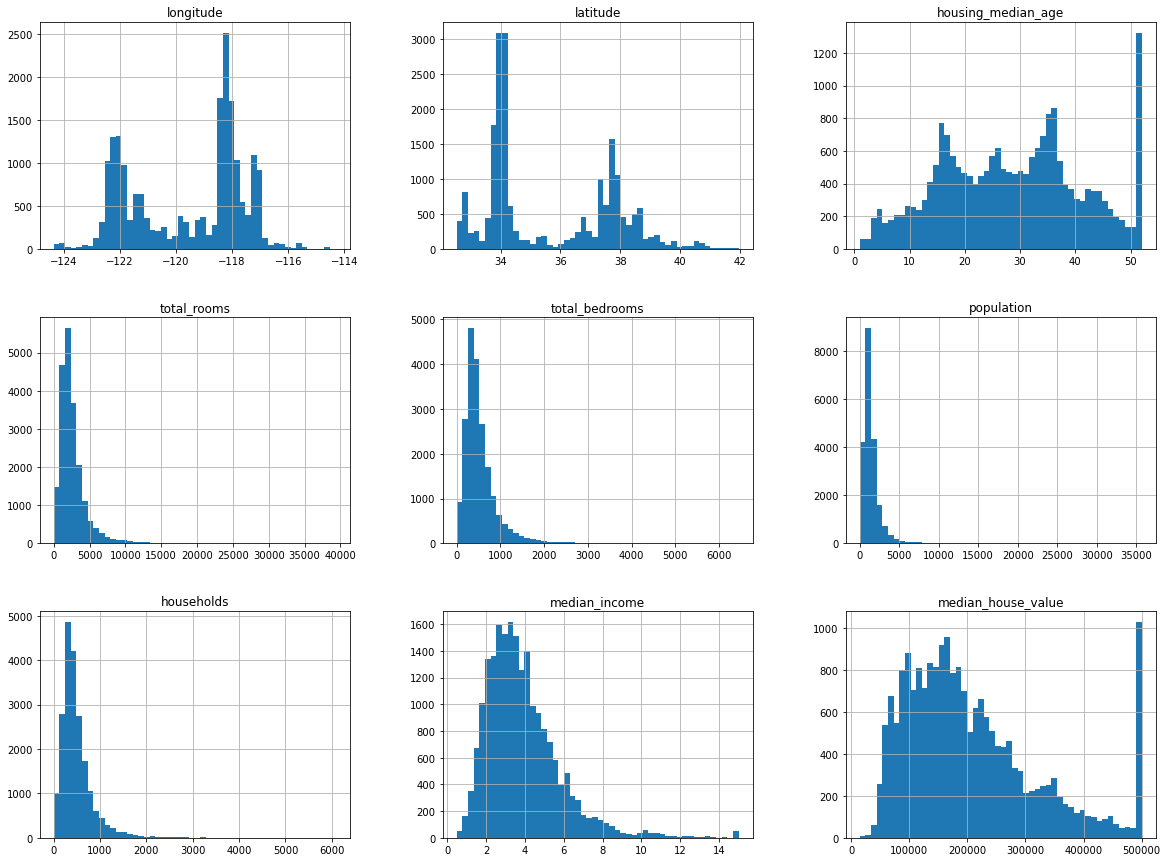

In [10]:
# We can draw a histogram for each of the dataframes features
# using the hist function
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show() # pandas internally uses matplotlib, and to display all the figures
           # the show() function must be called

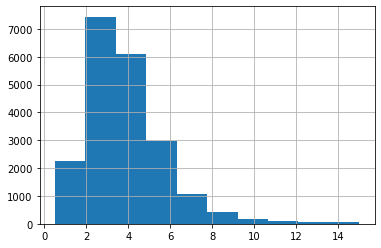

In [11]:
# if you want to have a histogram on an individual feature:
housing["median_income"].hist()
plt.show()

We can convert a floating point feature to a categorical feature
by binning or by defining a set of intervals. 

For example, to bin the 
households based on median_income we can use the pd.cut function

In [12]:
# assign each bin a categorical value [1, 2, 3, 4, 5] in this case.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

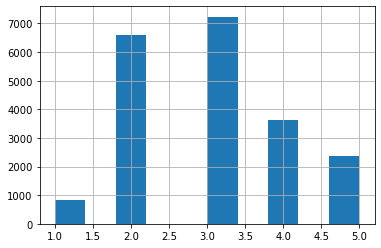

In [13]:
housing["income_cat"].hist()

#### Next let's visualize the household incomes based on latitude & longitude coordinates

Saving figure bad_visualization_plot


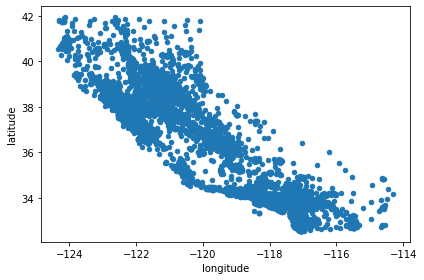

In [14]:
## here's a not so interestting way plotting it
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


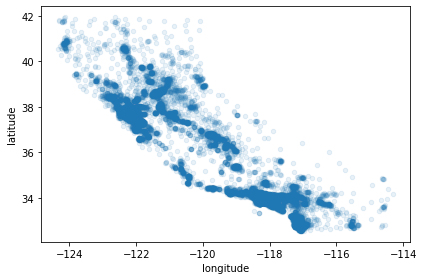

In [15]:
# we can make it look a bit nicer by using the alpha parameter, 
# it simply plots less dense areas lighter.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

/var/folders/ry/zrhyljyj7m310x6q60g91fqr0000gn/T/ipykernel_3245/399246598.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


Saving figure california_housing_prices_plot


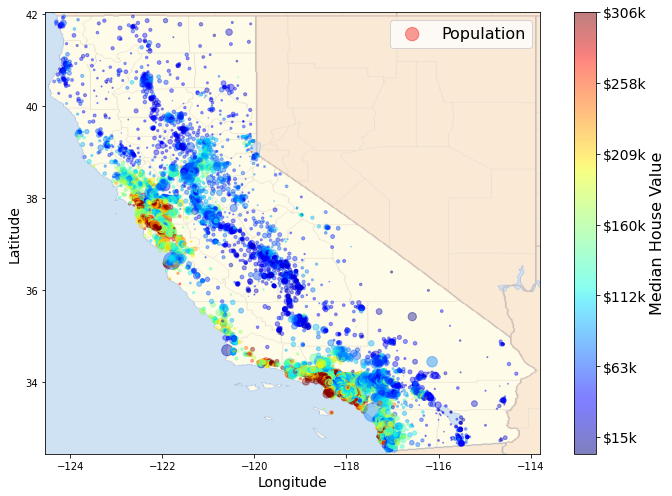

In [16]:
# A more interesting plot is to color code (heatmap) the dots
# based on income. The code below achieves this

# load an image of california
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
# overlay the califronia map on the plotted scatter plot
# note: plt.imshow still refers to the most recent figure
# that hasn't been plotted yet.
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

Not suprisingly, the most expensive houses are concentrated around the San Francisco/Los Angeles areas.

Up until now we have only visualized feature histograms and basic statistics. 

When developing machine learning models the predictiveness of a feature for a particular target of intrest is what's important.

It may be that only a few features are useful for the target at hand, or features may need to be augmented by applying certain transfomrations. 

None the less we can explore this using correlation matrices.

In [17]:
corr_matrix = housing.corr()

In [18]:
# for example if the target is "median_house_value", most correlated features can be sorted
# which happens to be "median_income". This also intuitively makes sense.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


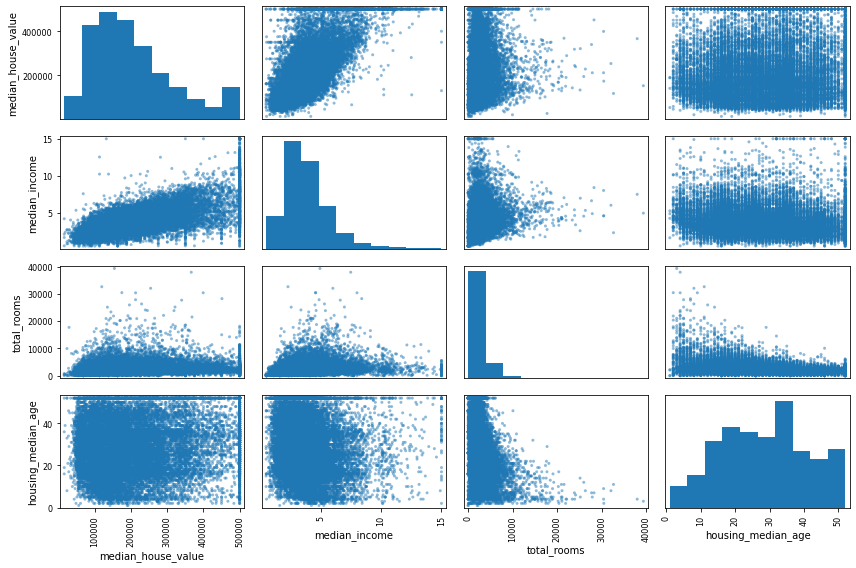

In [19]:
# the correlation matrix for different attributes/features can also be plotted
# some features may show a positive correlation/negative correlation or
# it may turn out to be completely random!
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


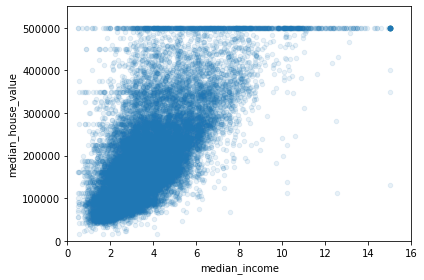

In [20]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

### Augmenting Features
New features can be created by combining different columns from our data set.

- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- etc.

In [21]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
# obtain new correlations
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

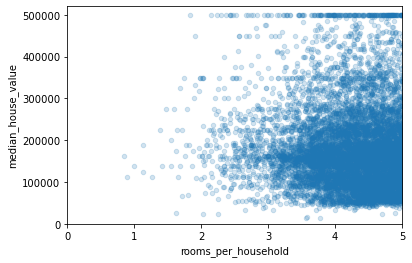

In [23]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Preparing Dastaset for ML

Once we've visualized the data, and have a certain understanding of how the data looks like. It's time to clean!

Most of your time will be spent on this step, although the datasets used in this project are relatively nice and clean... it could get real dirty.

After having cleaned your dataset you're aiming for:
- train set
- test set

In some cases you might also have a validation set as well for tuning hyperparameters (don't worry if you're not familiar with this term yet..)

In supervised learning setting your train set and test set should contain (**feature**, **target**) tuples. 
 - **feature**: is the input to your model
 - **target**: is the ground truth label
     - when target is categorical the task is a classification task
     - when target is floating point the task is a regression task
     
We will make use of **[scikit-learn](https://scikit-learn.org/stable/)** python package for preprocessing. 

Scikit learn is pretty well documented and if you get confused at any point simply look up the function/object!

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
# let's first start by creating our train and test sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [26]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set features
                                                       # the input to the model should not contain the true label
housing_labels = train_set["median_house_value"].copy()

### Dealing With Incomplete Data

In [27]:
# have you noticed when looking at the dataframe summary certain rows 
# contained null values? we can't just leave them as nulls and expect our
# model to handle them for us...
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


In [28]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1: simply drop rows that have null values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [29]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2: drop the complete feature

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


In [30]:
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3: replace na values with median values
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN,2,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN,4,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN,4,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND,2,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN,3,4.866192,NaN,2.468327


Could you think of another plausible imputation for this dataset? (Not graded)

### Prepare Data

In [31]:
# This cell implements the complete pipeline for preparing the data
# using sklearns TransformerMixins
# Earlier we mentioned different types of features: categorical, and floats.
# In the case of floats we might want to convert them to categories.
# On the other hand categories in which are not already represented as integers must be mapped to integers before
# feeding to the model.

# Additionally, categorical values could either be represented as one-hot vectors or simple as normalized/unnormalized integers.
# Here we encode them using one hot vectors.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="median") # use median imputation for missing values
housing_num = housing.drop("ocean_proximity", axis=1) # remove the categorical feature
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# 
class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    housing["population_per_household"]=housing["population"]/housing["households"]
    '''
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = AugmentFeatures(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
numerical_features = list(housing_num)
categorical_features = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

test_set.drop("median_house_value", axis=1, inplace=True)

### Select a model and train

Once we have prepared the dataset it's time to choose a model.

As our task is to predict the median_house_value (a floating value), regression is well suited for this.

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# let's try the full preprocessing pipeline on a few training instances
# data = test_set.iloc[:5] # wrong
data = housing.iloc[:5] # NEW https://piazza.com/class/ktuxvlqye5v3tz?cid=29
labels = housing_labels.iloc[:5]
data_prepared = full_pipeline.transform(data)

print("Predictions:", lin_reg.predict(data_prepared))
print("Actual labels:", list(labels))

Predictions: [200860.48973484 325527.93559759 201882.47991703  54956.04539331
 188116.26928254]
Actual labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


We can evaluate our model using certain metrics, one possible metric for regression is the mean absolute error

$$\text{MAE} = \frac{\sum_i^n |\hat{y_i} - y_i|}{n}$$

where $\hat{y}$ is the predicted value, and y is the ground truth label. 

In [33]:
from sklearn.metrics import mean_absolute_error

preds = lin_reg.predict(housing_prepared)
rmse = mean_absolute_error(housing_labels, preds)
rmse

49145.9385616408

# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset (airbnb dataset). We will predict airbnb price based on other features.

# [25 pts] Visualizing Data 


### [5 pts] Load the data + statistics

- load the dataset
- display the first 10 rows of the data
- drop the following columns: name, host_name, last_review
- display a summary of the statistics of the loaded data
- plot histograms for 3 features of your choice

In [34]:
# load the dataset
airbnb = pd.read_csv('datasets/airbnb/AB_NYC_2019.csv')

In [35]:
# display the first 10 rows of the data
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [36]:
# drop the following columns: name, host_name, last_review
airbnb.drop(columns=["name", "host_name", "last_review"], axis=1, inplace=True)
# display a summary of the statistics of the loaded data
airbnb.info()
airbnb.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


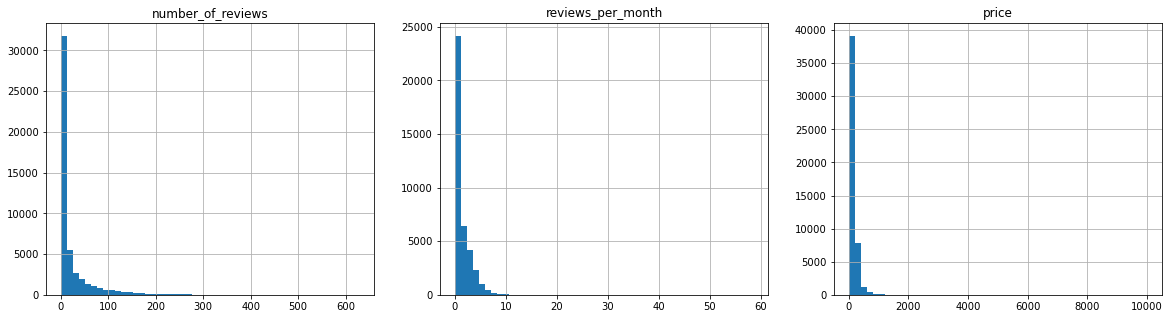

In [37]:
# plot histograms for 3 features of your choice
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
val1, val2, val3 = 'number_of_reviews', 'reviews_per_month', 'price'

ax1.title.set_text(val1)
airbnb[val1].hist(
    ax=ax1,
    bins=50)

ax2.title.set_text(val2)
airbnb[val2].hist(
    ax=ax2,
    bins=50)

ax3.title.set_text(val3)
airbnb[val3].hist(
    ax=ax3,
    bins=50)

plt.show()

### [5 pts] Plot median price per neighbourhood_group

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

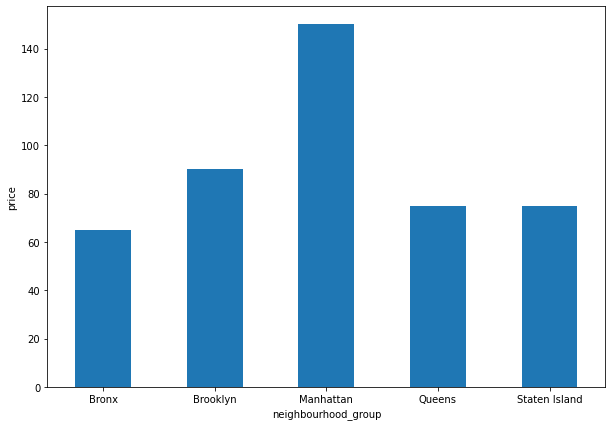

In [38]:
airbnb.groupby(['neighbourhood_group']).median()['price'].plot.bar(ylabel='price', rot=0, figsize=(10,7))

### [5 pts] Plot map of airbnbs throughout New York (if it gets too crowded take a subset of the data, and try to make it look nice if you can :) ). 

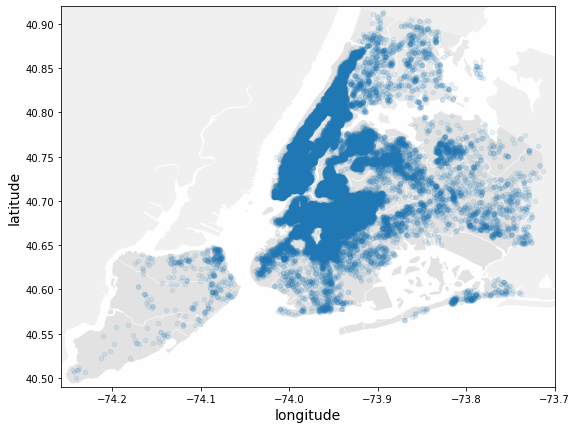

In [39]:
x = "longitude"
y = "latitude"
ax = airbnb.plot(
    kind="scatter", 
    x=x, 
    y=y, 
    figsize=(10,7),
    alpha=0.1)
plt.imshow(
    mpimg.imread('images/newyork.png'),
    extent = [-74.258, -73.7, 40.49,40.92],
    alpha=0.2)
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)
plt.show()

### [5 pts] Plot average price of hosts (host_id) who have more than 50 listings. 

<AxesSubplot:xlabel='host_id', ylabel='price'>

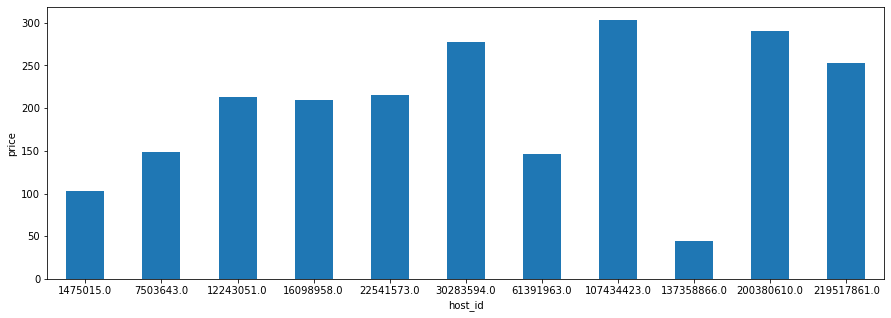

In [40]:
airbnb.where(airbnb['calculated_host_listings_count'] > 50) \
    .groupby('host_id') \
    .mean('price')['price'] \
    .plot.bar(ylabel='price', figsize=(15,5), rot=0)

### [5 pts] Plot correlation matrix
- which features have positive correlation?
    - `reviews_per_month` and `number_of_reviews` have a strong positive correlation.
    - `availability_365` and `minimum_nights` have a slight positive correlation
    - `calculated_host_listings_count` and `minimum_nights` have a slight positive correlation
- which features have negative correlation?
    - `longitude` and `price` have a very slight negative correlation.
    - `reviews_per_month` and `minimum_nights` have a slight negative correlation
    - `longitude` and `calculated_host_listings_count` have a small negative correlation
    
Overall the correlation plot gives us very little information about the interconnectedness of the attributes.

In [41]:
corr_matrix = airbnb.corr()

In [42]:
attributes = [
    'price',
    'longitude',
    'latitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']
for attribute in attributes:
    print(f'{attribute}\n{corr_matrix[attribute].sort_values(ascending=False)}\n')

price
price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

longitude
longitude                         1.000000
reviews_per_month                 0.145948
host_id                           0.127055
id                                0.090908
latitude                          0.084788
availability_365                  0.082731
number_of_reviews                 0.059094
minimum_nights                   -0.062747
calculated_host_listings_count   -0.114713
price                            -0.150019
Name: longitude, dtype: float64

latitude
latitude                          1.000000
longitude 

Saving figure correlation


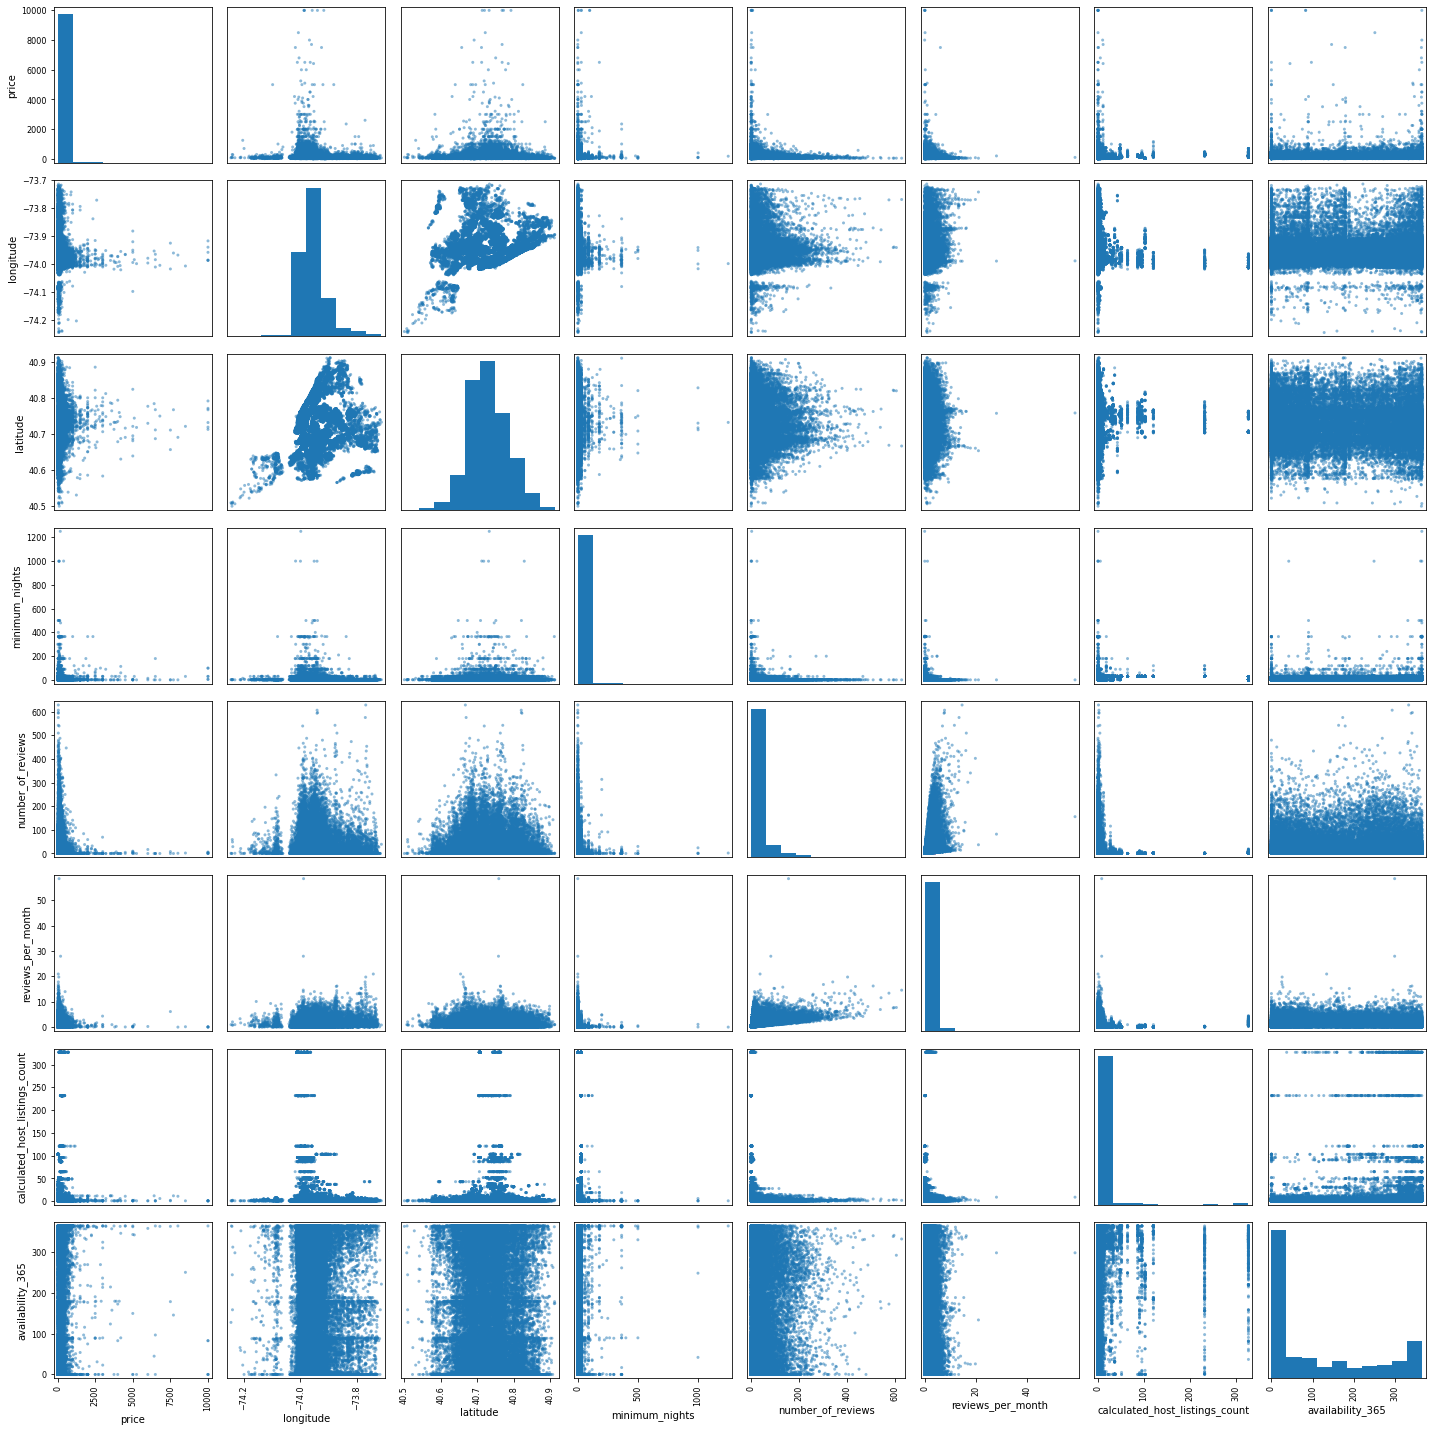

In [43]:
scatter_matrix(airbnb[attributes], figsize=(20,20))
save_fig('correlation')
plt.show()

# [25 pts] Prepare the Data

### [5 pts] Set aside 25% of the data as test set (75% train, 25% test).

In [44]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
price = 'price'
categorical_price = 'categorical_price'

bins = [-1,100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 2500.0, 5000.0, 10000.0, np.inf]
for i in range(1,len(bins)):
    assert(bins[i]-bins[i-1]>0)
airbnb[categorical_price] = pd.cut(airbnb[price],bins = bins,labels = [i for i in range(1, len(bins))])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in sss.split(airbnb, airbnb[categorical_price]):
    abnb_train_set = airbnb.loc[train_index]
    abnb_test_set = airbnb.loc[test_index]


# labels are actual price
abnb_test_labels = abnb_test_set[price].copy()
abnb_train_labels = abnb_train_set[price].copy()

# train set should not contain actual price
abnb_train_set.drop(price, axis=1, inplace=True)

# test set should not include price
abnb_test_set.drop(price, axis=1, inplace=True)

In [46]:
abnb_train_set.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.667100e+04,3.667100e+04,36671.000000,36671.000000,36671.000000,36671.000000,29220.000000,36671.000000,36671.000000
mean,1.895560e+07,6.741661e+07,40.729026,-73.952103,7.022715,23.416242,1.368056,7.156309,112.870770
std,1.097103e+07,7.855348e+07,0.054523,0.046339,20.777483,44.880430,1.687344,33.079026,131.655161
min,3.647000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.422985e+06,7.737249e+06,40.690160,-73.983030,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.960362e+07,3.037019e+07,40.723200,-73.955650,2.000000,5.000000,0.710000,1.000000,46.000000
75%,2.905732e+07,1.074344e+08,40.763155,-73.936150,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.716900,1250.000000,629.000000,58.500000,327.000000,365.000000


In [47]:
abnb_test_set.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.222400e+04,1.222400e+04,12224.000000,12224.000000,12224.000000,12224.000000,9623.000000,12224.000000,12224.000000
mean,1.920178e+07,6.823019e+07,40.728718,-73.952369,7.051702,22.849149,1.388907,7.107003,112.513007
std,1.101764e+07,7.878324e+07,0.054552,0.045606,19.688882,43.545117,1.659298,32.571374,131.528644
min,2.539000e+03,2.787000e+03,40.522110,-74.198260,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.606994e+06,8.055524e+06,40.689880,-73.983190,1.000000,1.000000,0.200000,1.000000,0.000000
50%,1.988499e+07,3.216326e+07,40.722540,-73.955875,3.000000,5.000000,0.740000,1.000000,43.000000
75%,2.946058e+07,1.074344e+08,40.763042,-73.936690,5.000000,23.000000,2.020000,2.000000,225.000000
max,3.648561e+07,2.743213e+08,40.911670,-73.712990,999.000000,576.000000,17.820000,327.000000,365.000000


In [48]:
abnb_test_labels, abnb_train_labels

(8048      75
 16686    175
 32367    160
 35840     80
 9220     155
         ... 
 34916    170
 45515    499
 46000    650
 48801    155
 44136     70
 Name: price, Length: 12224, dtype: int64,
 5822      80
 24749    150
 6081     200
 9623      40
 4713      44
         ... 
 4613      55
 24840     65
 22868     40
 48563    343
 32423     69
 Name: price, Length: 36671, dtype: int64)

### [5 pts] Augment the dataframe with two other features which you think would be useful

In [49]:
# months since they have been posting
num_months_posting = 'num_months_posting'
number_of_reviews = 'number_of_reviews'
reviews_per_month = 'reviews_per_month'
abnb_train_set[num_months_posting] = abnb_train_set[number_of_reviews] / abnb_train_set[reviews_per_month]
abnb_test_set[num_months_posting] = abnb_test_set[number_of_reviews] / abnb_test_set[reviews_per_month]
abnb_train_set[num_months_posting].fillna(0,inplace=True)
abnb_test_set[num_months_posting].fillna(0,inplace=True)

# how much of the year does a single booking take up
one_stay_percent_of_year = 'one_stay_percent_of_year'
availability_365 = 'availability_365'
minimum_nights = 'minimum_nights'
abnb_train_set[one_stay_percent_of_year] = abnb_train_set[minimum_nights] / abnb_train_set[availability_365]
abnb_test_set[one_stay_percent_of_year] = abnb_test_set[minimum_nights] / abnb_test_set[availability_365]

### [5 pts] Impute any missing feature with a method of your choice, and briefly discuss why you chose this imputation method

In [50]:
# ANSWER
# nan reviews per month => assume median number of reviews
# If there is a NaN for the number of reviews per month I will set it to the medain of the whole dataset
reviews_per_month = 'reviews_per_month'
median_reviews_per_month = airbnb[reviews_per_month].median()
abnb_train_set[reviews_per_month].fillna(median_reviews_per_month,inplace=True)
abnb_test_set[reviews_per_month].fillna(median_reviews_per_month,inplace=True)

In [51]:
airbnb.values

array([[2539, 2787, 'Brooklyn', ..., 6, 365, 2],
       [2595, 2845, 'Manhattan', ..., 2, 355, 3],
       [3647, 4632, 'Manhattan', ..., 1, 365, 2],
       ...,
       [36485431, 23492952, 'Manhattan', ..., 1, 27, 2],
       [36485609, 30985759, 'Manhattan', ..., 6, 2, 1],
       [36487245, 68119814, 'Manhattan', ..., 1, 23, 1]], dtype=object)

In [52]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,categorical_price
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,3
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,2
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,1
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,1


In [53]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   host_id                         48895 non-null  int64   
 2   neighbourhood_group             48895 non-null  object  
 3   neighbourhood                   48895 non-null  object  
 4   latitude                        48895 non-null  float64 
 5   longitude                       48895 non-null  float64 
 6   room_type                       48895 non-null  object  
 7   price                           48895 non-null  int64   
 8   minimum_nights                  48895 non-null  int64   
 9   number_of_reviews               48895 non-null  int64   
 10  reviews_per_month               38843 non-null  float64 
 11  calculated_host_listings_count  48895 non-null  int64   
 12  availability_365  

### [10 pts] Code complete data pipeline using sklearn mixins

In [54]:
from sklearn.model_selection import train_test_split
airbnb = pd.read_csv('datasets/airbnb/AB_NYC_2019.csv')
airbnb_true_vals = airbnb['price'].copy()
airbnb.drop(columns=["name", "host_name", "last_review","id", "host_id", "price"], axis=1, inplace=True)
cat_feat = ['neighbourhood_group', 'neighbourhood', 'room_type']
numeric_columns = airbnb.drop(columns=cat_feat,axis=1)
numeric_features = list(numeric_columns)
print(f'{numeric_features=}')

print(airbnb.info())

numeric_features=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dt

In [55]:
# imputer = SimpleImputer(strategy="median") # use median imputation for missing values
minimum_nights_ix = 2
number_of_reviews_ix = 3
reviews_per_month_ix = 4
availability_365_ix = 6

class AbnbAugmentFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        v1 = X[:, number_of_reviews_ix]
        v2 = X[:, reviews_per_month_ix]
        num_months_posting = np.divide(v1,v2,out=np.zeros_like(v1),where= v2 != 0)
        v3 = X[:, minimum_nights_ix]
        v4 = X[:, availability_365_ix]
        one_stay_percent_of_year = np.divide(v3,v4,out=np.zeros_like(v3),where= v4 != 0)
        return np.c_[X, num_months_posting, one_stay_percent_of_year]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AbnbAugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numeric_features),
        ("cat", OneHotEncoder(), cat_feat),
    ])

airbnb_prepared = full_pipeline.fit_transform(airbnb)
train_set, test_set, train_label, test_label = train_test_split(airbnb_prepared, 
                                                                airbnb_true_vals, 
                                                                test_size=0.25, 
                                                                random_state=42)

# [15 pts] Fit a model of your choice

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using Mean Absolute Error (MAE).
Provide both test and train set MAE values.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(train_set, train_label)

train_pred = lin_reg.predict(train_set)
test_pred = lin_reg.predict(test_set)

train_mae = mean_absolute_error(train_label, train_pred)
test_mae = mean_absolute_error(test_label, test_pred)

print(f'{train_mae=}')
print(f'{test_mae=}')

train_mae=72.86928149499015
test_mae=68.79961790008474
